In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df=pd.read_csv('titanic.csv')
df.head()

,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,"Allen, Mr. William Henry",3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [3]:
df.shape 

(891, 12)

In [4]:
df.columns

Index(['PassengerId', 'Name', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Survived'],
      dtype='object')

In [5]:
df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis=1,inplace=True)

In [6]:
df.head()

,Pclass,Sex,Age,Fare,Survived
0,3,male,22.0,7.2500,0
1,1,female,38.0,71.2833,1
2,3,female,26.0,7.9250,1
3,1,female,35.0,53.1000,1
4,3,male,35.0,8.0500,0


In [8]:
target=df.Survived
input=df.drop(['Survived'],axis=1)

In [12]:
input.head()

,Pclass,Sex,Age,Fare
0,3,male,22.0,7.2500
1,1,female,38.0,71.2833
2,3,female,26.0,7.9250
3,1,female,35.0,53.1000
4,3,male,35.0,8.0500


In [11]:
target.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [14]:
dummies=pd.get_dummies(input.Sex) 

In [15]:
dummies.head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [16]:
input=pd.concat([input,dummies],axis=1)

In [17]:
input.head() 

,Pclass,Sex,Age,Fare,female,male
0,3,male,22.0,7.2500,0,1
1,1,female,38.0,71.2833,1,0
2,3,female,26.0,7.9250,1,0
3,1,female,35.0,53.1000,1,0
4,3,male,35.0,8.0500,0,1


In [18]:
input.drop('Sex',axis=1,inplace=True)

In [19]:
input.head()

,Pclass,Age,Fare,female,male
0,3,22.0,7.2500,0,1
1,1,38.0,71.2833,1,0
2,3,26.0,7.9250,1,0
3,1,35.0,53.1000,1,0
4,3,35.0,8.0500,0,1


In [21]:
input.isnull().sum()  

Pclass      0
Age       177
Fare        0
female      0
male        0
dtype: int64

In [24]:
input.Age[:10] 

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64

<AxesSubplot:>

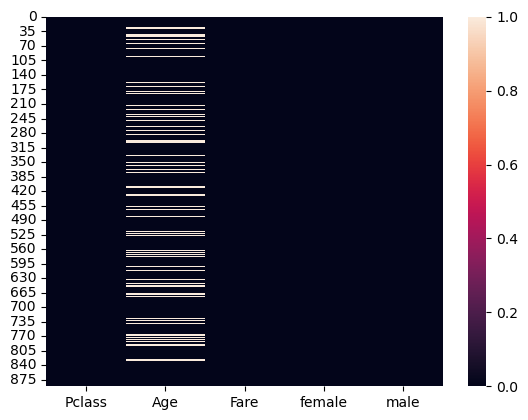

In [25]:
sns.heatmap(input.isnull()) 

In [26]:
mean=input.Age.mean() 

In [27]:
mean

29.69911764705882

In [28]:
input.Age=input.Age.fillna(mean) 

In [29]:
input.isnull().sum()

Pclass    0
Age       0
Fare      0
female    0
male      0
dtype: int64

In [30]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(input,target,test_size=0.2)


In [31]:
xtrain.shape

(712, 5)

In [32]:
len(xtest)

179

In [33]:
len(input)

891

In [34]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(xtrain,ytrain)

GaussianNB()

In [35]:
model.score(xtest,ytest)

0.8156424581005587

In [38]:
xtest[0:10]

,Pclass,Age,Fare,female,male
890,3,32.000000,7.7500,0,1
379,3,19.000000,7.7750,0,1
865,2,42.000000,13.0000,1,0
234,2,24.000000,10.5000,0,1
252,1,62.000000,26.5500,0,1
142,3,24.000000,15.8500,1,0
65,3,29.699118,15.2458,0,1
139,1,24.000000,79.2000,0,1
363,3,35.000000,7.0500,0,1
678,3,43.000000,46.9000,1,0


In [39]:
ytest[:10] 

890    0
379    0
865    1
234    0
252    0
142    1
65     1
139    0
363    0
678    0
Name: Survived, dtype: int64

In [41]:
model.predict(xtest[:10]) 

array([0, 0, 1, 0, 0, 1, 0, 0, 0, 1], dtype=int64)

In [42]:
model.predict_proba(xtest[:10])

array([[0.98831087, 0.01168913],
       [0.98608019, 0.01391981],
       [0.02968262, 0.97031738],
       [0.97252898, 0.02747102],
       [0.87994677, 0.12005323],
       [0.05838071, 0.94161929],
       [0.98829646, 0.01170354],
       [0.71745741, 0.28254259],
       [0.98842286, 0.01157714],
       [0.04586082, 0.95413918]])